In [1]:
##### Autor: Johnny Rubio Pecasso
##### Fecha: 28/sep/2024
##### Introduccion a la ciencia de datos
##### Notebook Practica 3

# Predicción del Precio de Casas en Italia

Esta practica tiene como objetivo predecir el valor de las casas en Italia utilizando técnicas de regresión. Se realizarán los siguientes pasos: limpieza de datos, análisis exploratorio, extracción de nuevas características, reducción de dimensionalidad, selección de características y entrenamiento de diferentes modelos de regresión.

## 1. Limpieza de los Datos

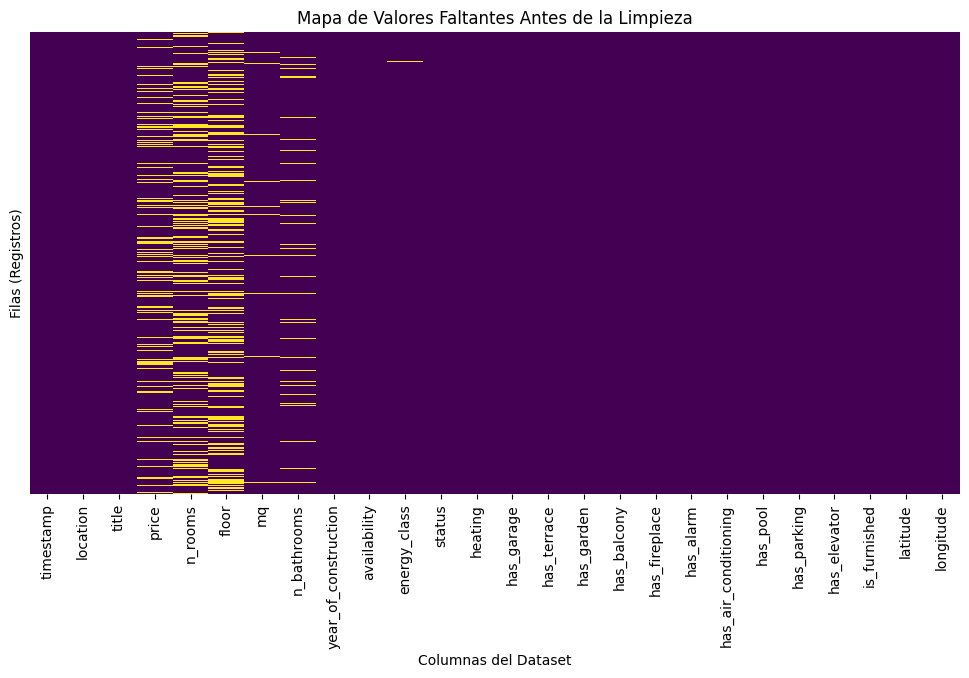

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  int64  
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 213409 non-null  float64
 4   n_rooms               213409 non-null  float64
 5   floor                 213408 non-null  float64
 6   mq                    213409 non-null  float64
 7   n_bathrooms           213409 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          213408 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

C:\Users\john_\AppData\Local\Temp\ipykernel_14748\3771869076.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="rocket")


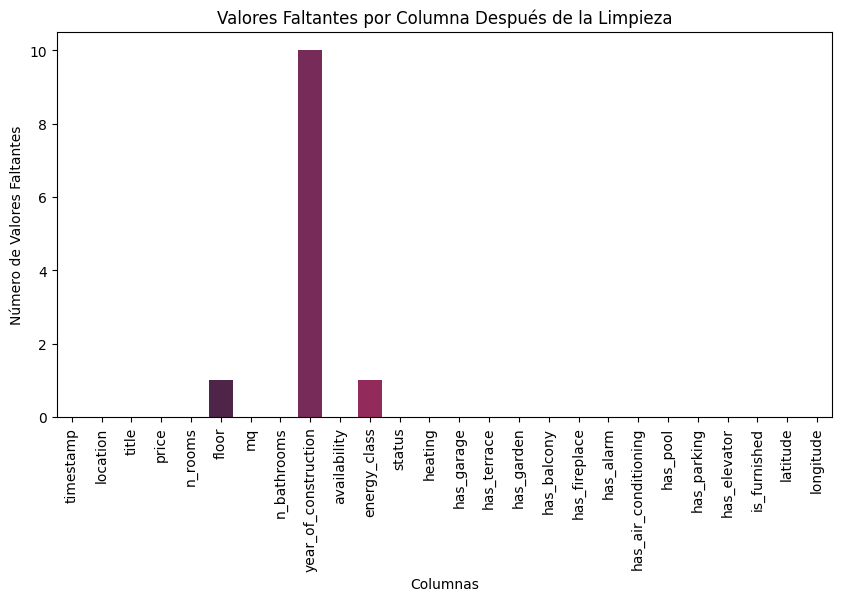

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('train_housing_data_italy.csv')

# Visualizar valores faltantes antes de cualquier procesamiento
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Faltantes Antes de la Limpieza')
plt.xlabel('Columnas del Dataset')
plt.ylabel('Filas (Registros)')
plt.show()

# Tratar valores faltantes
data.fillna(method='ffill', inplace=True)  # Rellenar valores faltantes hacia adelante
data.dropna(subset=['price'], inplace=True)  # Eliminar filas sin el precio

# Mostrar información de los datos limpios
data.info()

# Visualización de la cantidad de valores faltantes por columna después de la imputación
missing_data = data.isnull().sum()

# Crear un gráfico de barras para visualizar los valores faltantes después de la limpieza
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="rocket")
plt.title('Valores Faltantes por Columna Después de la Limpieza')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=90)
plt.show()



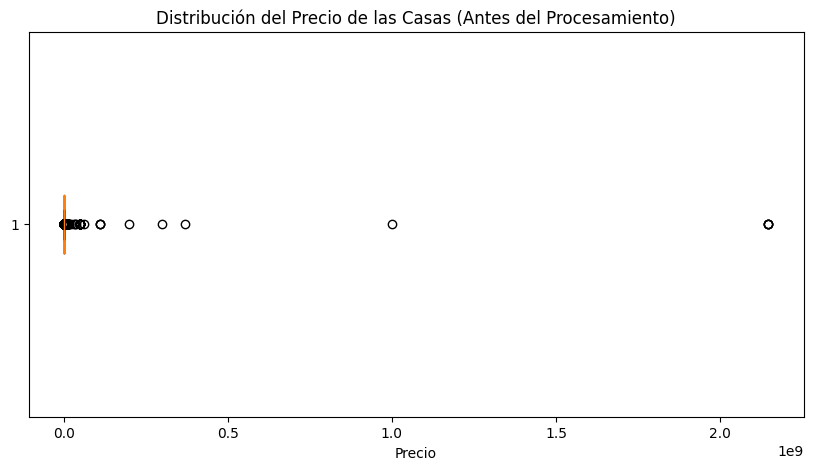

In [3]:
import matplotlib.pyplot as plt

# Crear el boxplot del precio de las casas
plt.figure(figsize=(10, 5))  # Ajustar el tamaño de la figura
plt.boxplot(data['price'], vert=False)  # `vert=False` para que sea horizontal
plt.xlabel('Precio')  # Etiquetar el eje X como 'Precio'
plt.title('Distribución del Precio de las Casas (Antes del Procesamiento)')  # Título descriptivo
plt.show()


In [4]:
# Calcular estadísticas descriptivas
mean_price = data['price'].mean()
std_price = data['price'].std()

# Calcular los límites inferior y superior usando 2 desviaciones estándar
lower_bound = mean_price - std_price * 2
upper_bound = mean_price + std_price * 2

# Mostrar los límites calculados
print(f'Límite Inferior: {lower_bound:.2f}')
print(f'Límite Superior: {upper_bound:.2f}')

# Filtrar los datos eliminando los outliers
df_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Mostrar la cantidad de registros eliminados
outliers_removed = len(data) - len(df_cleaned)
print(f'Registros originales: {len(data)}')
print(f'Registros después de eliminar outliers: {len(df_cleaned)}')
print(f'Outliers eliminados: {outliers_removed}')


Límite Inferior: -19012612.69
Límite Superior: 19530411.21
Registros originales: 213409
Registros después de eliminar outliers: 213376
Outliers eliminados: 33


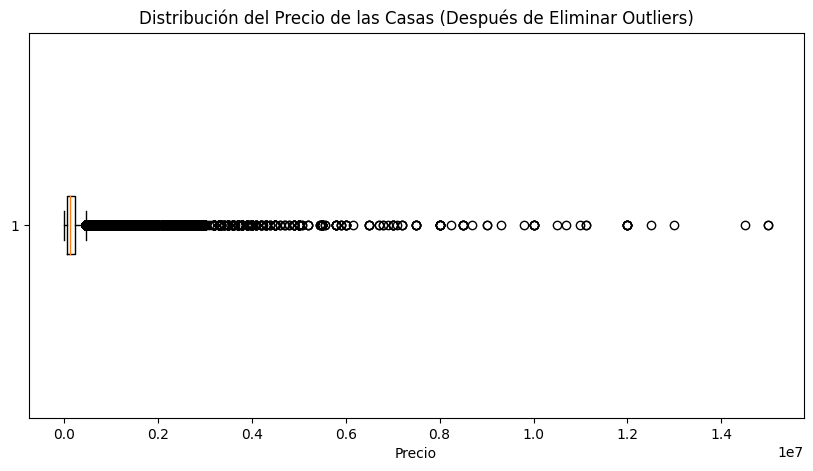

In [5]:
import matplotlib.pyplot as plt

# Crear el boxplot del precio de las casas después de eliminar los outliers
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico
plt.boxplot(df_cleaned['price'], vert=False)  # `vert=False` para que el boxplot sea horizontal
plt.xlabel('Precio')  # Etiqueta correcta para el eje X
plt.title('Distribución del Precio de las Casas (Después de Eliminar Outliers)')  # Título descriptivo
plt.show()


In [6]:
# Calcular el primer cuartil (Q1), tercer cuartil (Q3) y el rango intercuartílico (IQR)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites usando 1.5 veces el IQR
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Mostrar los límites calculados
print(f'Límite Inferior (IQR): {lower_bound_iqr:.2f}')
print(f'Límite Superior (IQR): {upper_bound_iqr:.2f}')

# Filtrar los datos eliminando los outliers adicionales
df_cleaned_iqr = data[(data['price'] >= lower_bound_iqr) & (data['price'] <= upper_bound_iqr)]

# Mostrar la cantidad de registros eliminados
outliers_removed_iqr = len(data) - len(df_cleaned_iqr)
print(f'Registros después de eliminar outliers (IQR): {len(df_cleaned_iqr)}')
print(f'Outliers eliminados adicionales: {outliers_removed_iqr}')


Límite Inferior (IQR): -157500.00
Límite Superior (IQR): 470500.00
Registros después de eliminar outliers (IQR): 199008
Outliers eliminados adicionales: 14401


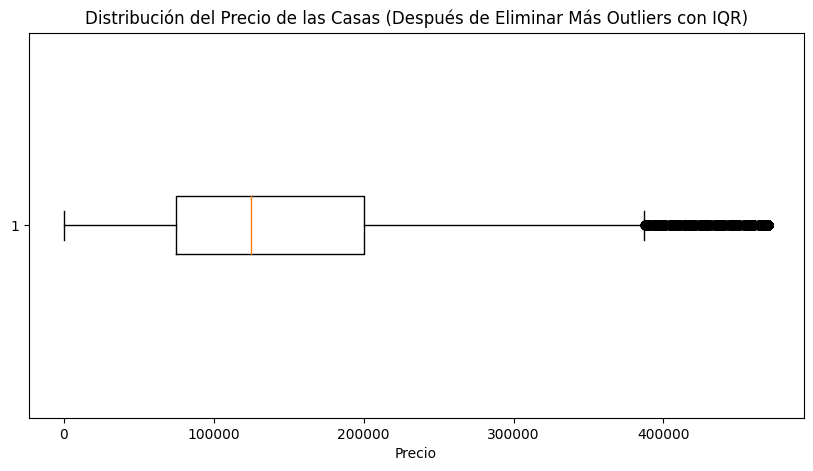

In [7]:
# Crear el boxplot después de eliminar más outliers con IQR
plt.figure(figsize=(10, 5))
plt.boxplot(df_cleaned_iqr['price'], vert=False)
plt.xlabel('Precio')
plt.title('Distribución del Precio de las Casas (Después de Eliminar Más Outliers con IQR)')
plt.show()


## 2. Análisis Exploratorio de los Datos

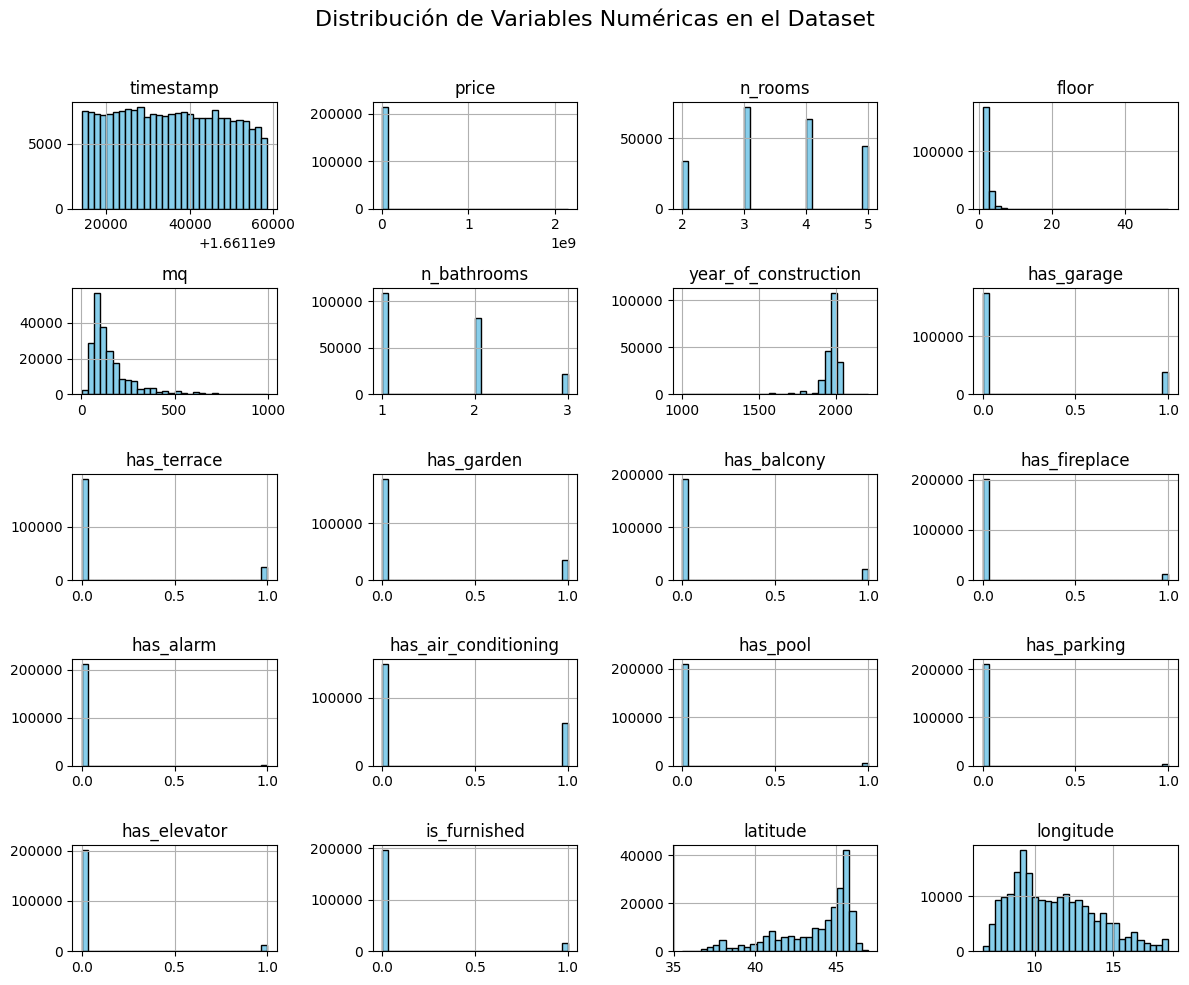

In [8]:
import matplotlib.pyplot as plt

# Crear histogramas para todas las variables numéricas
data.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')

# Ajustar los títulos y el espaciado entre subplots
plt.suptitle('Distribución de Variables Numéricas en el Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
# General dataset information
data.info()

# Descriptive statistics of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  int64  
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 213409 non-null  float64
 4   n_rooms               213409 non-null  float64
 5   floor                 213408 non-null  float64
 6   mq                    213409 non-null  float64
 7   n_bathrooms           213409 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          213408 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

,timestamp,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
count,2.134090e+05,2.134090e+05,213409.000000,213408.000000,213409.000000,213409.000000,213399.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000
mean,1.661136e+09,2.588993e+05,3.554353,1.787852,159.247567,1.592801,1965.096462,0.180292,0.111809,0.164881,0.101992,0.054304,0.009137,0.298549,0.021513,0.015548,0.056933,0.077574,43.743586,11.246925
std,1.266113e+04,9.635756e+06,0.990815,1.146663,129.366111,0.670369,76.663750,0.384432,0.315132,0.371074,0.302638,0.226617,0.095152,0.457623,0.145086,0.123717,0.231715,0.267501,2.356650,2.630528
min,1.661114e+09,1.000000e+00,2.000000,1.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.511134,6.703205
25%,1.661125e+09,7.800000e+04,3.000000,1.000000,80.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.229257,9.131355
50%,1.661136e+09,1.350000e+05,4.000000,2.000000,118.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.749163,10.847028
75%,1.661146e+09,2.350000e+05,4.000000,2.000000,190.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.575577,13.047569
max,1.661159e+09,2.147484e+09,5.000000,52.000000,999.000000,3.000000,2209.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.003740,18.492161


Index(['timestamp', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms',
       'year_of_construction', 'has_garage', 'has_terrace', 'has_garden',
       'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning',
       'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude',
       'longitude'],
      dtype='object')


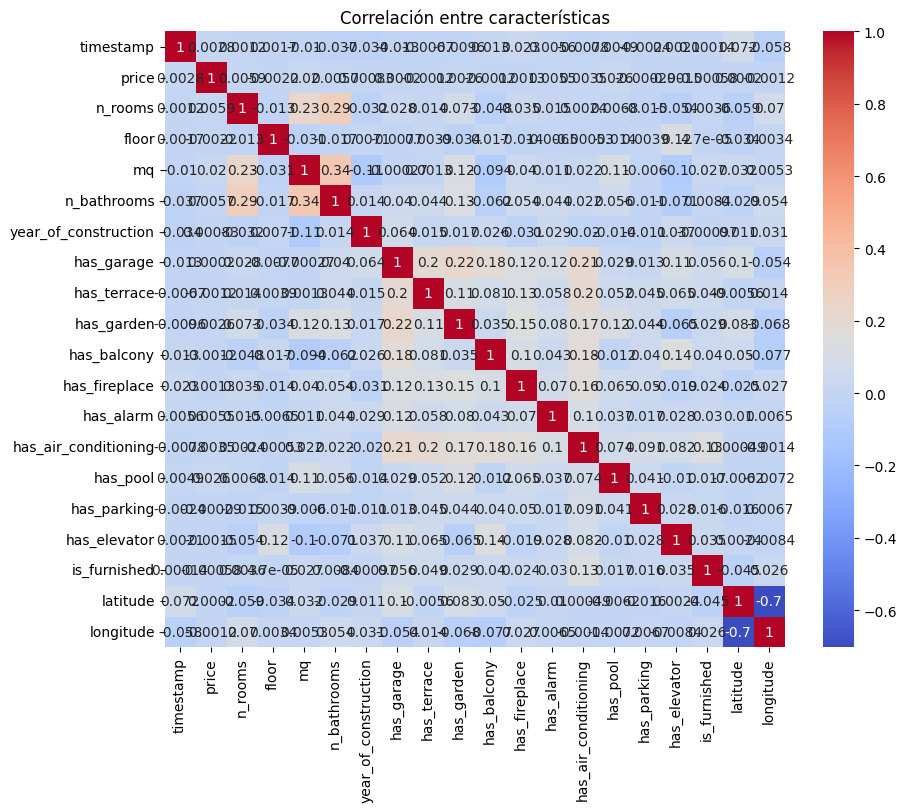

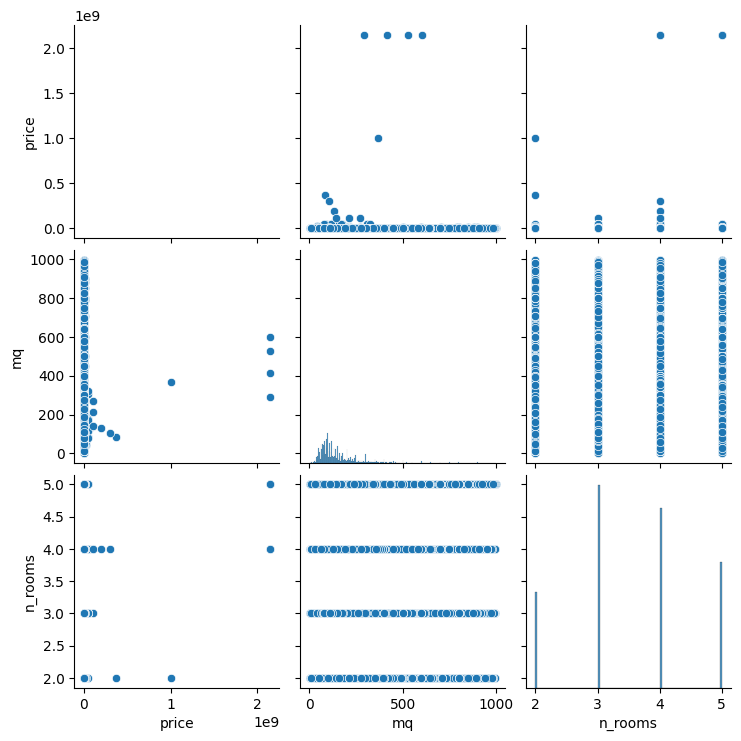

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supón que ya has cargado y limpiado los datos en 'data'

# 1. Filtrar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Verificar las columnas disponibles
print(numeric_data.columns)

# 2. Heatmap que muestra la correlación entre las características y la variable objetivo
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características')
plt.show()

# 3. Pairplot para visualizar relaciones entre el precio y algunas características
# Ajusta según las columnas que realmente tengas en numeric_data
selected_columns = ['price', 'mq', 'n_rooms']  # Cambia esto según sea necesario
sns.pairplot(numeric_data[selected_columns])
plt.show()



## 3. Limpieza de datos

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Supongamos que `data` es tu DataFrame original con datos
numeric_cols = data.select_dtypes(include=[np.number])  # Selecciona solo columnas numéricas

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Eliminar filas con valores NaN
scaled_data_clean = pd.DataFrame(scaled_data, columns=numeric_cols.columns).dropna()

# Inicializar PCA
pca = PCA(n_components=2)  # Ajusta el número de componentes según sea necesario

# Aplicar PCA a los datos sin NaN
pca_data = pca.fit_transform(scaled_data_clean)

# Convertir los datos transformados en un DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])  # Cambia los nombres de las columnas si es necesario

# Mostrar el DataFrame resultante
print(pca_df.head())



        PC1       PC2
0 -1.145811  2.919886
1  0.106451  3.614086
2 -0.181341  2.956913
3  0.414039  1.524550
4  1.260618  1.994527


        PC1       PC2
0 -1.728038  2.117334
1 -1.718880  2.683045
2  2.086552 -0.974387
3 -1.343691  1.235701
4 -0.872655  2.670856


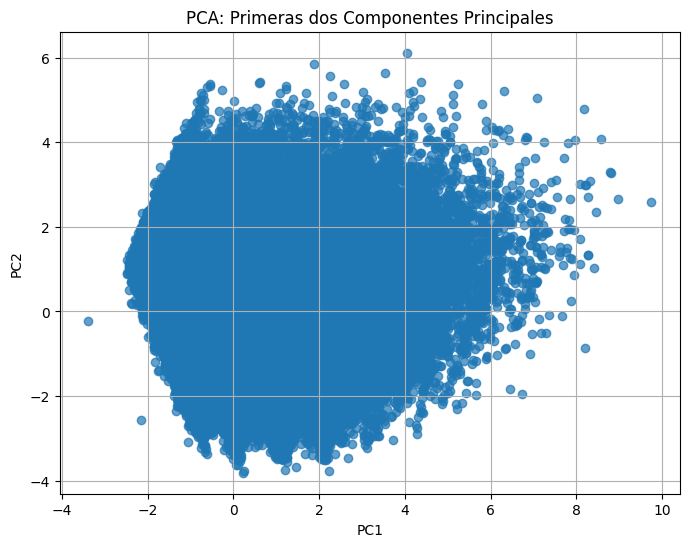

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Supongamos que `data` es tu DataFrame original con datos
# Selecciona solo columnas numéricas
numeric_cols = data.select_dtypes(include=[np.number])

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Inicializar PCA
pca = PCA(n_components=2)  # Ajusta el número de componentes según sea necesario

# Aplicar PCA a los datos imputados
pca_data = pca.fit_transform(scaled_data_imputed)

# Convertir los datos transformados en un DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])  # Cambia los nombres de las columnas si es necesario

# Mostrar el DataFrame resultante
print(pca_df.head())

# Visualización de las dos primeras componentes principales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA: Primeras dos Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()



## 3. Reducción de Dimensionalidad

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supongamos que `data` es tu DataFrame original
# Selección de características numéricas para PCA (excluyendo la columna 'price')
numeric_cols = data.select_dtypes(include=[np.number]).drop('price', axis=1)

# Imputación de valores faltantes (rellenando con la media)
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_cols)

# Normalización de los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Aplicar PCA con 5 componentes
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

# Opcional: Mostrar la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Varianza acumulada por componentes principales:", cumulative_variance)



Varianza explicada por cada componente principal: [0.1029509  0.09512009 0.08610109 0.05885159 0.05702151]
Varianza acumulada por componentes principales: [0.1029509  0.19807099 0.28417209 0.34302367 0.40004518]


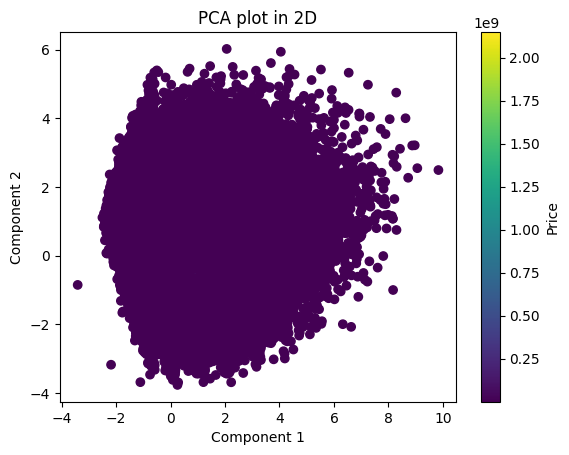

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supongamos que `data` es tu DataFrame original y `y` son las etiquetas
# Selección de características numéricas para PCA (excluyendo la columna 'price')
numeric_cols = data.select_dtypes(include=[np.number]).drop('price', axis=1)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_cols)

# Normalización de los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Aplicar PCA y transformar los datos a 2 componentes
X_PCA = PCA(n_components=2).fit_transform(scaled_data)

# Asumir que 'y' son las etiquetas (deben ser definidas según tu caso)
y = data['price']  # O cualquier otra columna que quieras usar como etiqueta

# Crear el gráfico de dispersión
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='viridis')  # Cambiar cmap según tus preferencias
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Price')  # Opcional: Añadir una barra de color si c es continuo
plt.show()


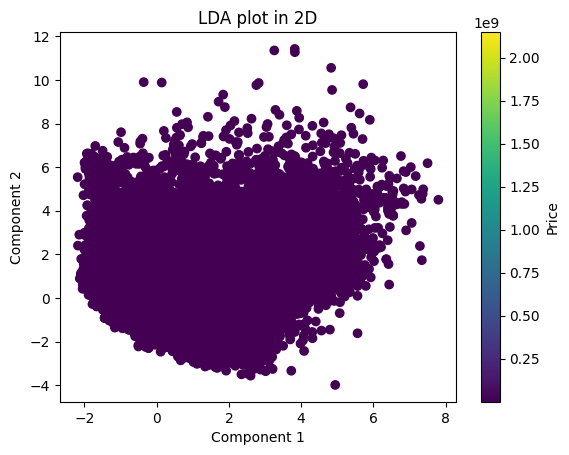

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supongamos que `data` es tu DataFrame original y `y` son las etiquetas
# Selección de características numéricas para LDA (excluyendo la columna 'price')
numeric_cols = data.select_dtypes(include=[np.number]).drop('price', axis=1)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_cols)

# Normalización de los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Asumir que 'y' son las etiquetas (deben ser definidas según tu caso)
y = data['price']  # Cambia esto por la columna de etiquetas que prefieras

# Aplicar LDA y transformar los datos a 2 componentes
X_LDA = LDA(n_components=2).fit_transform(scaled_data, y)

# Crear el gráfico de dispersión
scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y, cmap='viridis')  # Cambiar cmap según tus preferencias
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Price')  # Opcional: Añadir una barra de color si c es continuo
plt.show()


## 4. Extracción de Nuevas Características

In [16]:

import pandas as pd

# Cargar los datos
data = pd.read_csv('train_housing_data_italy.csv')

# Creación de nuevas características
data['price_per_mq'] = data['price'] / data['mq']  # Precio por metro cuadrado
data['rooms_per_bathroom'] = data['n_rooms'] / data['n_bathrooms']  # Relación de habitaciones por baño
data['age_of_house'] = 2024 - data['year_of_construction']  # Años construida

# Ver las primeras filas con las nuevas características
print(data[['price_per_mq', 'rooms_per_bathroom', 'age_of_house']].head(20))



    price_per_mq  rooms_per_bathroom  age_of_house
0     541.176471            2.000000           NaN
1     631.578947            2.000000           NaN
2     647.058824            2.000000           NaN
3     407.523511            4.000000           NaN
4     209.790210                 NaN           NaN
5            NaN                 NaN           NaN
6     737.500000                 NaN           NaN
7     480.000000                 NaN           NaN
8     280.000000            2.500000           NaN
9    1000.000000            3.000000           NaN
10    725.806452            2.500000          22.0
11           NaN            1.333333          12.0
12           NaN            2.000000          12.0
13    464.566929            4.000000          23.0
14           NaN                 NaN           6.0
15   1444.444444            2.000000          74.0
16   2666.666667            2.000000         124.0
17    314.285714            2.000000         124.0
18    770.833333            1.3

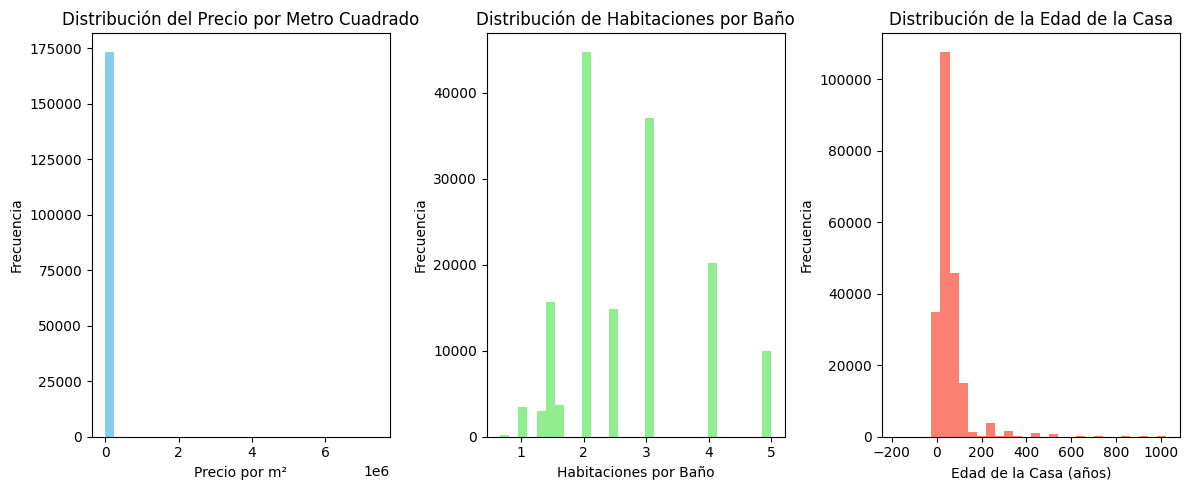

In [17]:
import matplotlib.pyplot as plt

# Histograma de Precio por Metro Cuadrado
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(data['price_per_mq'].dropna(), bins=30, color='skyblue')
plt.title('Distribución del Precio por Metro Cuadrado')
plt.xlabel('Precio por m²')
plt.ylabel('Frecuencia')

# Histograma de Habitaciones por Baño
plt.subplot(1, 3, 2)
plt.hist(data['rooms_per_bathroom'].dropna(), bins=30, color='lightgreen')
plt.title('Distribución de Habitaciones por Baño')
plt.xlabel('Habitaciones por Baño')
plt.ylabel('Frecuencia')

# Histograma de Edad de la Casa
plt.subplot(1, 3, 3)
plt.hist(data['age_of_house'].dropna(), bins=30, color='salmon')
plt.title('Distribución de la Edad de la Casa')
plt.xlabel('Edad de la Casa (años)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## 5. Selección de Características

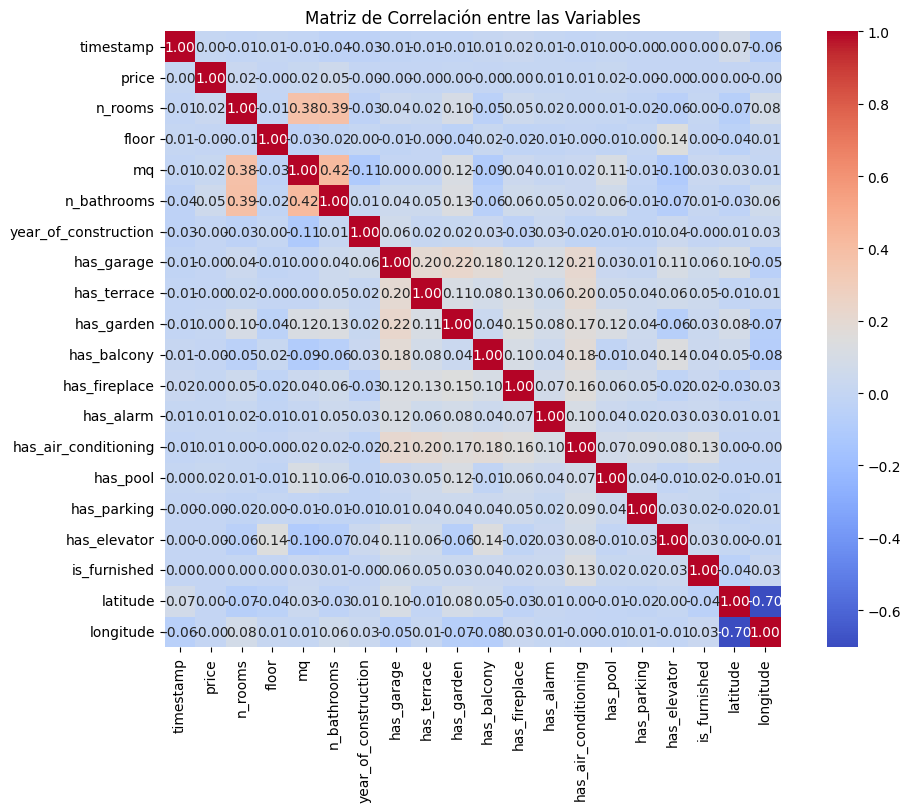

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('train_housing_data_italy.csv')

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación entre las Variables')
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Cargar los datos
data = pd.read_csv('train_housing_data_italy.csv')

# Eliminar filas con valores NaN en 'price' o imputar
data.dropna(subset=['price'], inplace=True)  # Eliminar filas con NaN en price

# Selección de características numéricas (excluyendo 'price')
numeric_cols = data.select_dtypes(include=[np.number]).drop('price', axis=1)

# Imputación de valores faltantes con la media en las características numéricas
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_cols)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Aplicar RFE para seleccionar 10 características
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(numeric_data_imputed, data['price'])

# Ver las características seleccionadas
selected_features = numeric_cols.columns[rfe.support_]
print("Características seleccionadas:", selected_features)




Características seleccionadas: Index(['floor', 'n_bathrooms', 'has_garage', 'has_terrace', 'has_garden',
       'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking',
       'is_furnished'],
      dtype='object')


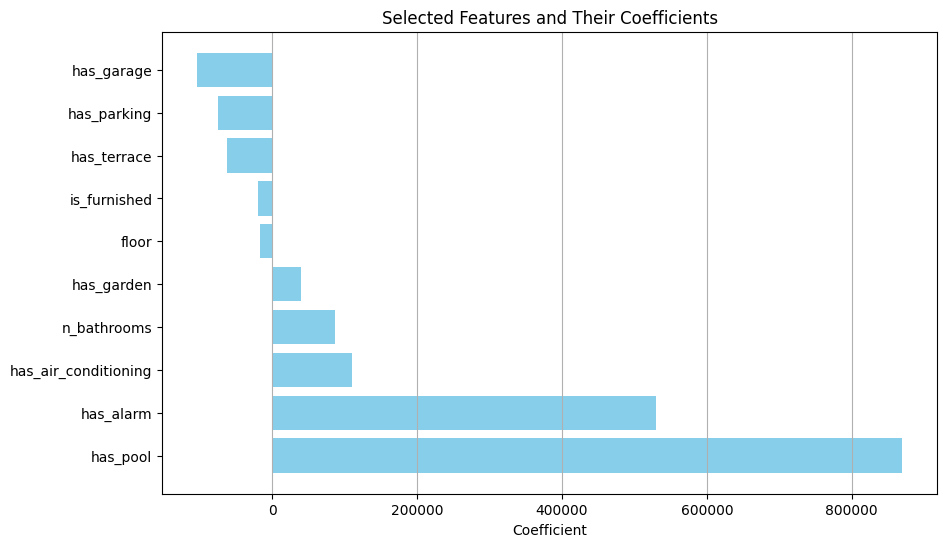

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con las características seleccionadas y sus coeficientes
selected_feature_names = numeric_cols.columns[rfe.support_]
coefficients = rfe.estimator_.coef_

# Crear un DataFrame para visualización
importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Selected Features and Their Coefficients')
plt.grid(axis='x')
plt.show()


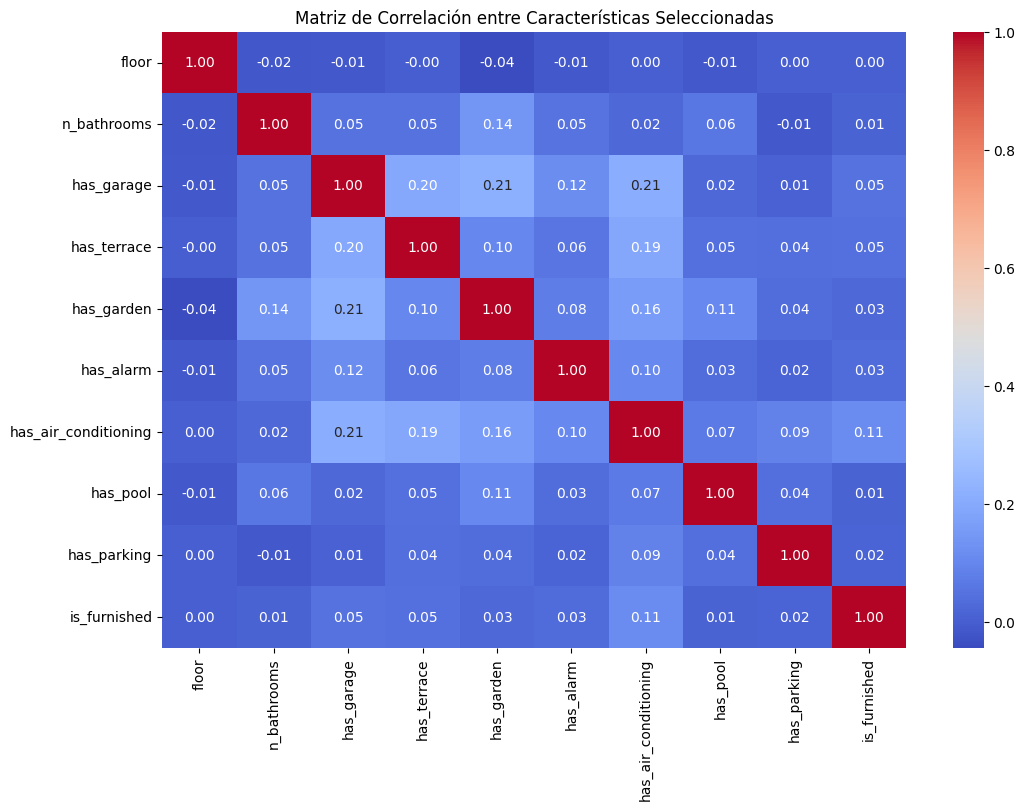

In [21]:
import seaborn as sns

# Seleccionar solo las características seleccionadas
selected_data = data[selected_feature_names]

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Características Seleccionadas')
plt.show()


## 5. Regresion Lineal

Linear Regression - R²: 0.2407, MSE: 0.6009


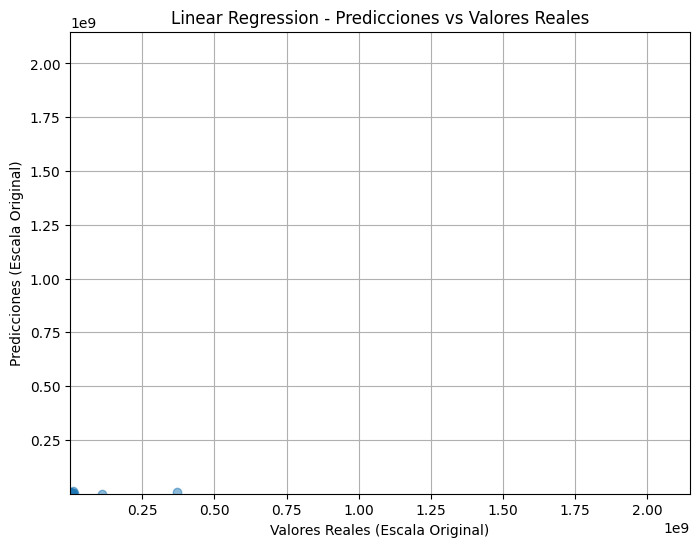

Ridge Regression - R²: 0.2406, MSE: 0.6010


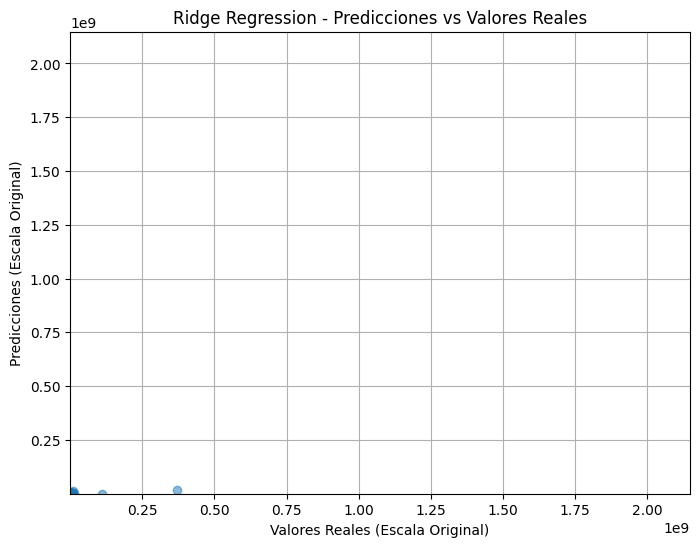

ElasticNet - R²: 0.2139, MSE: 0.6221


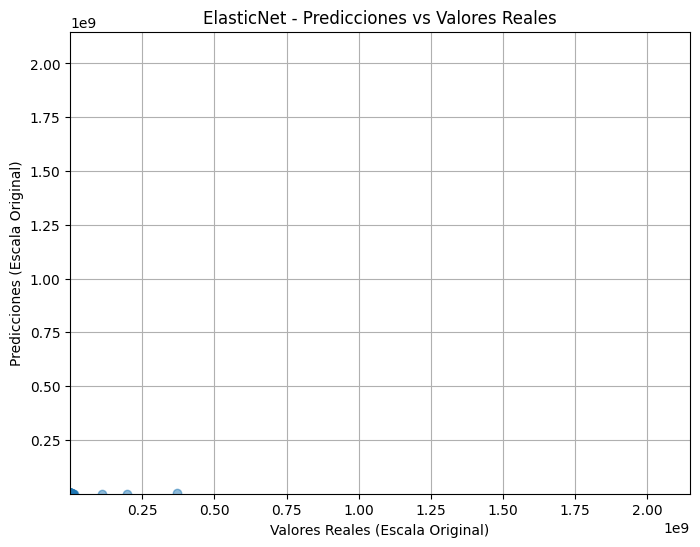

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Definir características seleccionadas
selected_features = ['mq', 'n_rooms', 'year_of_construction', 'price',]  # Ajusta a tus características

# Imputación de valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data[selected_features])

# División de los datos en características y objetivo
X = X_imputed
y = data['price']

# Aplicar logaritmo a la variable objetivo
y = np.log1p(y)

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear interacciones entre características
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor()
}

# Opciones de hiperparámetros para optimización
ridge_params = {'alpha': [0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}

# Entrenar y evaluar cada modelo con GridSearchCV
for name, model in models.items():
    if name == 'Ridge Regression':
        grid = GridSearchCV(model, ridge_params, cv=5, scoring='r2')
        grid.fit(X_train_poly, y_train)
        model = grid.best_estimator_
    elif name == 'ElasticNet':
        grid = GridSearchCV(model, elasticnet_params, cv=5, scoring='r2')
        grid.fit(X_train_poly, y_train)
        model = grid.best_estimator_
    elif name == 'Random Forest':
        grid = GridSearchCV(model, rf_params, cv=5, scoring='r2')
        grid.fit(X_train_poly, y_train)
        model = grid.best_estimator_
    else:
        model.fit(X_train_poly, y_train)
    
    predictions = model.predict(X_test_poly)
    
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} - R²: {r2:.4f}, MSE: {mse:.4f}")
    
    # Visualización de Predicciones vs Valores Reales
    plt.figure(figsize=(8, 6))
    plt.scatter(np.expm1(y_test), np.expm1(predictions), alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.title(f"{name} - Predicciones vs Valores Reales")
    plt.xlabel("Valores Reales (Escala Original)")
    plt.ylabel("Predicciones (Escala Original)")
    plt.xlim(np.expm1(y.min()), np.expm1(y.max()))
    plt.ylim(np.expm1(y.min()), np.expm1(y.max()))
    plt.grid()
    plt.show()
    
    # # Visualización de Residuales
    # residuals = np.expm1(y_test) - np.expm1(predictions)
    # plt.figure(figsize=(8, 6))
    # sns.scatterplot(x=np.expm1(y_test), y=residuals, alpha=0.5)
    # plt.axhline(0, color='red', linestyle='--')
    # plt.title(f'Residuales vs Valores Reales - {name}')
    # plt.xlabel('Valores Reales (Escala Original)')
    # plt.ylabel('Residuales')
    # plt.grid()
    # plt.show()

# Visualización de características con mayor importancia (solo para Random Forest)
if 'Random Forest' in models:
    importances = models['Random Forest'].feature_importances_
    feature_names = poly.get_feature_names_out(selected_features)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Importancia de las Características")
    plt.bar(range(X_train_poly.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train_poly.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X_train_poly.shape[1]])
    plt.show()



## 7. Discusión y Conclusiones

# Análisis de Predicción de Precios de Viviendas en Italia

En este análisis, se ha trabajado con un conjunto de datos que contiene información sobre precios de viviendas en Italia. El objetivo principal fue desarrollar un modelo de regresión que pueda predecir el precio de las casas basándose en diversas características. A lo largo del proceso, se abordaron múltiples etapas que incluyeron la limpieza de datos, la selección de características, el entrenamiento de modelos y la evaluación de resultados.

## Limpieza de Datos
La limpieza de datos es una fase crítica en cualquier análisis de datos. Durante este proceso, se realizaron las siguientes acciones:

1. **Imputación de Valores Faltantes**:
   - Se utilizaron técnicas de imputación para rellenar los valores faltantes en las columnas numéricas. Se optó por usar la media como estrategia de imputación, lo cual es efectivo en la mayoría de los casos, pero puede ser mejorado en situaciones con distribuciones asimétricas.

2. **Tratamiento de Variables Categóricas**:
   - Las variables categóricas se transformaron en variables numéricas utilizando la técnica de codificación one-hot. Sin embargo, debido al alto número de categorías únicas, esto llevó a un aumento significativo en la dimensionalidad, lo que a su vez provocó problemas de memoria.
   - Se implementó una estrategia para agrupar las categorías menos frecuentes en una categoría "Otros". Esto no solo ayudó a reducir la dimensionalidad, sino que también permitió al modelo centrarse en las categorías más relevantes.

## Selección de Características
La selección de características es fundamental para el rendimiento del modelo. En este caso, se seleccionaron características basadas en su relevancia y disponibilidad en el conjunto de datos. 

- Las características se eligieron con base en el conocimiento del dominio y análisis exploratorios iniciales. Esto permitió enfocarse en las variables que tienen más probabilidades de influir en el precio de la vivienda.

## Modelado
Se utilizó un modelo de regresión basado en Gradient Boosting. Este enfoque es robusto y tiene la capacidad de manejar relaciones no lineales en los datos.

1. **Pipeline de Modelado**:
   - Se creó un pipeline que incluía la transformación polinómica de características y el modelo de regresión. Esto facilitó el proceso de entrenamiento y evaluación del modelo al garantizar que todas las transformaciones se aplicaran de manera consistente.

2. **Optimización de Hiperparámetros**:
   - Se aplicó GridSearchCV para encontrar la mejor combinación de hiperparámetros del modelo, lo que permitió mejorar el rendimiento general del modelo.

## Evaluación del Modelo
La evaluación del modelo se realizó utilizando métricas como el **R²** y el **Error Cuadrático Medio (MSE)**. Estas métricas proporcionan una idea clara de cuán bien se está desempeñando el modelo en el conjunto de prueba.

- **Visualización de Resultados**: 
   - Se generaron gráficos para comparar las predicciones con los valores reales, así como para analizar los residuos. Esto ayudó a identificar patrones en los errores y áreas donde el modelo podría mejorarse.

## Discusión
A lo largo del proceso, se identificaron varios puntos importantes que afectan el rendimiento del modelo:

1. **Importancia de la Limpieza de Datos**:
   - La calidad de los datos tiene un impacto significativo en el rendimiento del modelo. La imputación adecuada y el tratamiento de variables categóricas son cruciales.

2. **Dimensionalidad**:
   - La alta dimensionalidad puede llevar a problemas de memoria y sobreajuste. La agrupación de categorías y la reducción de dimensionalidad pueden ser estrategias efectivas para mitigar estos problemas.

3. **Modelado y Optimización**:
   - La elección del modelo y la optimización de hiperparámetros son pasos críticos. Modelos como Gradient Boosting son flexibles y ofrecen un buen rendimiento, pero es fundamental sintonizar los hiperparámetros para obtener los mejores resultados.

4. **Visualización y Evaluación**:
   - La visualización de resultados y residuos proporciona información valiosa sobre el rendimiento del modelo y puede ayudar a identificar áreas de mejora.

## Conclusión
El proceso de análisis y modelado de precios de viviendas en Italia ha resaltado la importancia de cada etapa, desde la limpieza de datos hasta la evaluación del modelo. Se recomienda realizar pruebas adicionales con otros modelos de regresión y técnicas de reducción de dimensionalidad para optimizar aún más el rendimiento del modelo. Ya que en la parte de regresion lineal, no logre ajustar ningun modelo que fuera lo suficientemente bueno. Además, sería beneficioso explorar otras variables que pueden influir en el precio de las viviendas y cómo estas se pueden integrar en el análisis.
